In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

/home/hojoon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/hojoon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
DATA_FILE = 'birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [3]:
X = tf.placeholder(tf.float32, shape = (None), name = 'X')
Y = tf.placeholder(tf.float32, shape = (None), name = 'Y')

w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

Y_predicted = w * X + b

loss = tf.reduce_mean(tf.square(Y - Y_predicted, name = 'loss'))

optimizer = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

In [4]:
start = time.time()
writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(30):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss))
    writer.close()
    w_out, b_out = sess.run([w,b])
print('Time spent: %f' %(time.time() - start))

Epoch 0: 121688.10665036738
Epoch 1: 75771.7661218876
Epoch 2: 55239.01469578367
Epoch 3: 40698.16497428529
Epoch 4: 30398.519768526778
Epoch 5: 23101.289941478986
Epoch 6: 17929.74105669395
Epoch 7: 14263.403894871473
Epoch 8: 11663.138903677464
Epoch 9: 9818.059137366945
Epoch 10: 8508.124732336495
Epoch 11: 7577.471975755179
Epoch 12: 6915.768446733244
Epoch 13: 6444.848745863535
Epoch 14: 6109.354731375177
Epoch 15: 5870.019718342519
Epoch 16: 5699.0373437497765
Epoch 17: 5576.669016190106
Epoch 18: 5488.91903629154
Epoch 19: 5425.85064850701
Epoch 20: 5380.38709350444
Epoch 21: 5347.524178295469
Epoch 22: 5323.68029908622
Epoch 23: 5306.3175170002505
Epoch 24: 5293.614611161407
Epoch 25: 5284.272049623309
Epoch 26: 5277.36589421035
Epoch 27: 5272.235220298462
Epoch 28: 5268.391601807438
Epoch 29: 5265.495636321604
Time spent: 2.963929


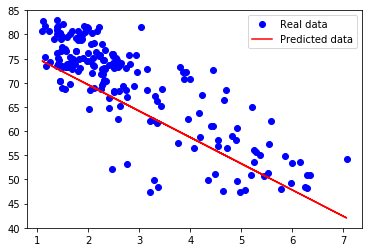

In [5]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()